# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2> Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2> Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2> Data</h2>

<h3> Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3> Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2> Mapping the real-world problem to an ML problem</h2>

<h3> Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3> Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3> Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2> Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2> Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1> Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
#matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#separating byte files and asm files 

source = 'train'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    files = os.listdir(source)
    for file in files:
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination)

<h2> Distribution of malware classes in whole data set </h2>

In [19]:
Y=pd.read_csv("trainLabels.csv")
Y.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


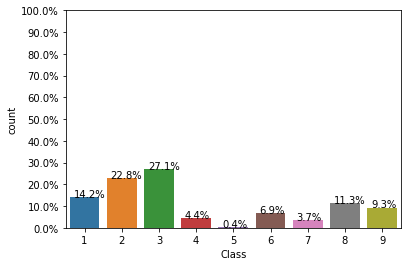

In [3]:
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2> Feature extraction </h2>

<h3> File size  of byte files as a feature </h3>

In [20]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'Id':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     Id      size  Class
0  01azqd4InC7m9JpocGv5  5.012695      9
1  01IsoiSMh5gxyDYTl4CB  6.556152      2
2  01jsnpXSAlgw6aPeDxrU  4.602051      9
3  01kcPWA9K2BOxQeS5Rju  0.679688      1
4  01SuzwMJEIXsK7A8dQbl  0.438965      8


In [5]:
print(data_size_byte.shape)

(5500, 3)


In [6]:
class_bytes = np.array(class_bytes)
print(class_bytes.shape)

(5500,)


In [7]:
byte_size = data_size_byte['size'].values
print(byte_size.shape)

(5500,)


<h3> box plots of file size (.byte files) feature </h3>

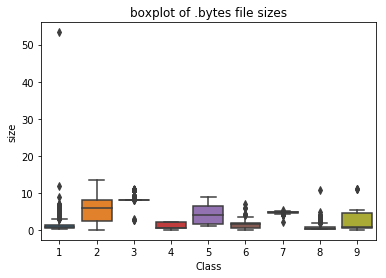

In [8]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

We have separated byte files and now we checked the size of byte files for each class labels. In box plot, as the plots are not similar for all class labels, the file size may have some impact on the prediction of class labels.

<h3> Feature extraction from byte files </h3>

In [9]:
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
bi_gram_vocab = []
for index, value in enumerate(byte_vocab.split(',')):
    for j in range(0, len(byte_vocab.split(','))):
        bi_gram_vocab.append(value + ' ' + byte_vocab.split(',')[j])
len(bi_gram_vocab)        

66049

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp

vector = CountVectorizer(lowercase= False, ngram_range= (2,2), vocabulary= bi_gram_vocab)
byte_matrix = sp.dok_matrix((0,66049), dtype=np.int8)
files = os.listdir('byteFiles')

for file in tqdm(files):
    f = open('byteFiles/' + file)
    vect = vector.fit_transform([f.read().replace('\n', ' ').lower()])
    byte_matrix = sp.vstack([byte_matrix, vect])
    
print(byte_matrix.shape)    

100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [5:26:25<00:00,  3.56s/it]

(5500, 66049)


In [12]:
bi_gram_vocab.append('size')
print(byte_matrix.shape)
print()

(5500, 66049)


In [13]:
byte_size = byte_size.reshape(-1,1)
byte_matrix = sp.hstack([byte_matrix, byte_size])
print(byte_matrix.shape)

(5500, 66050)


In [14]:
byte_df = pd.DataFrame.sparse.from_spmatrix(byte_matrix)
print(byte_df.head())

      0       1      2       3      4      5       6       7      8      \
0  273053.0  1002.0  801.0  1170.0  943.0  840.0  1125.0  1003.0  860.0   
1   19852.0   719.0   64.0    43.0  159.0   10.0     6.0    10.0   35.0   
2   16032.0   592.0  157.0   144.0  509.0  590.0   551.0   146.0  523.0   
3    9903.0   204.0   59.0    69.0  103.0   34.0    19.0    21.0   55.0   
4   15289.0    58.0   20.0   110.0    8.0   11.0     3.0     5.0    8.0   

   9      ...  66040  66041  66042  66043  66044  66045  66046  66047  66048  \
0  987.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    8.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2  154.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3   14.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    2.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      66049  
0  5.012695  
1  6.556152  
2  4.602051  
3  0.679688 

KeyboardInterrupt: 

In [21]:
byte_df.columns = bi_gram_vocab

In [22]:
byte_df.head()

,00 00,00 01,00 02,00 03,00 04,00 05,00 06,00 07,00 08,00 09,...,?? f8,?? f9,?? fa,?? fb,?? fc,?? fd,?? fe,?? ff,?? ??,size
0,273053.0,1002.0,801.0,1170.0,943.0,840.0,1125.0,1003.0,860.0,987.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.012695
1,19852.0,719.0,64.0,43.0,159.0,10.0,6.0,10.0,35.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.556152
2,16032.0,592.0,157.0,144.0,509.0,590.0,551.0,146.0,523.0,154.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.602051
3,9903.0,204.0,59.0,69.0,103.0,34.0,19.0,21.0,55.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.679688
4,15289.0,58.0,20.0,110.0,8.0,11.0,3.0,5.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438965


### Get 2000 important features for bigrams

In [26]:
r_cfl=RandomForestClassifier(n_estimators=1000,random_state=42,n_jobs=-1)
r_cfl.fit(byte_matrix,class_bytes)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(byte_matrix,class_bytes)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                             n_jobs=-1,
                                                             random_state=42))

In [28]:
top_features = np.argsort(-r_cfl.feature_importances_)

In [40]:
top_features = top_features[:2000]
top_fea_columns = [bi_gram_vocab[i] for i in top_features]
len(top_fea_columns)

2000

In [45]:
byte_df = byte_df[top_fea_columns]
byte_df.head()

,9a 8a,1e 6f,41 44,2f 91,5a 52,58 50,27 82,49 4e,50 41,4e 47,...,ca ff,7e 1b,8b 3d,39 28,3d 22,39 7d,34 e9,8b cb,cc cd,13 07
0,5.0,6.0,11.0,7.0,4.0,6.0,2.0,8.0,9.0,5.0,...,17.0,13.0,84.0,3.0,13.0,8.0,4.0,3.0,3.0,5.0
1,14.0,0.0,3.0,21.0,0.0,1.0,0.0,2.0,0.0,11.0,...,237.0,0.0,7.0,0.0,5.0,23.0,1.0,9.0,4.0,1.0
2,4.0,2.0,6.0,6.0,2.0,34.0,3.0,17.0,36.0,3.0,...,78.0,2.0,49.0,5.0,6.0,7.0,2.0,2778.0,7.0,4.0
3,1.0,2.0,20.0,0.0,3.0,12.0,1.0,16.0,41.0,14.0,...,3.0,1.0,3.0,2.0,1.0,2.0,1.0,8.0,2.0,1.0
4,2.0,3.0,4.0,0.0,2.0,3.0,2.0,0.0,41.0,2.0,...,5.0,2.0,1.0,3.0,14.0,3.0,0.0,1.0,0.0,2.0


In [47]:
byte_df.to_pickle('pickels/byte_df')

### Compute Unigram on Byte files

In [48]:
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
uni_gram_vocab = byte_vocab.split(',')
len(uni_gram_vocab)

257

In [50]:
vector = CountVectorizer(lowercase= False, ngram_range= (2,2), vocabulary= uni_gram_vocab)
byte_matrix = sp.dok_matrix((0,257), dtype=np.int8)
files = os.listdir('byteFiles')

for file in tqdm(files):
    f = open('byteFiles/' + file)
    vect = vector.fit_transform([f.read().replace('\n', ' ').lower()])
    byte_matrix = sp.vstack([byte_matrix, vect])
    
print(byte_matrix.shape)

100%|████████████████████████████████████████████████████████████████████████████| 5500/5500 [2:19:56<00:00,  1.53s/it]

(5500, 257)


In [52]:
byte_df_uni = pd.DataFrame.sparse.from_spmatrix(byte_matrix, columns= uni_gram_vocab)
byte_df_uni.head()

,00,01,02,03,04,05,06,07,08,09,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
byte_file_df = pd.concat([byte_df_uni, byte_df], axis=1)
byte_file_df.shape

(5500, 2257)

In [54]:
byte_file_df['y'] = class_bytes

In [55]:
byte_file_df.head()

,00,01,02,03,04,05,06,07,08,09,...,7e 1b,8b 3d,39 28,3d 22,39 7d,34 e9,8b cb,cc cd,13 07,y
0,0,0,0,0,0,0,0,0,0,0,...,13.0,84.0,3.0,13.0,8.0,4.0,3.0,3.0,5.0,9
1,0,0,0,0,0,0,0,0,0,0,...,0.0,7.0,0.0,5.0,23.0,1.0,9.0,4.0,1.0,2
2,0,0,0,0,0,0,0,0,0,0,...,2.0,49.0,5.0,6.0,7.0,2.0,2778.0,7.0,4.0,9
3,0,0,0,0,0,0,0,0,0,0,...,1.0,3.0,2.0,1.0,2.0,1.0,8.0,2.0,1.0,1
4,0,0,0,0,0,0,0,0,0,0,...,2.0,1.0,3.0,14.0,3.0,0.0,1.0,0.0,2.0,8


In [13]:
byte_file_df.to_pickle('pickels/byte_df')

In [14]:
byte_file_df = pd.read_pickle('pickels/byte_df')
#byte_file_df.insert(loc=0, column='id', value=np.array(fnames))
byte_file_df.head()

,id,00,01,02,03,04,05,06,07,08,...,7e 1b,8b 3d,39 28,3d 22,39 7d,34 e9,8b cb,cc cd,13 07,y
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,13.0,84.0,3.0,13.0,8.0,4.0,3.0,3.0,5.0,9
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,0.0,7.0,0.0,5.0,23.0,1.0,9.0,4.0,1.0,2
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,2.0,49.0,5.0,6.0,7.0,2.0,2778.0,7.0,4.0,9
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,1.0,3.0,2.0,1.0,2.0,1.0,8.0,2.0,1.0,1
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,2.0,1.0,3.0,14.0,3.0,0.0,1.0,0.0,2.0,8


In [15]:
byte_file_df.drop(['y'], axis=1, inplace= True)

In [16]:
byte_file_df.to_pickle('pickels/byte_df')

In [17]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in tqdm(df.columns):
        if (str(feature_name) != str('id') \
            and str(feature_name)!=str('Class') \
            and 'Sparse' not in str(result_df[feature_name].dtype)):
            max_value = result1[feature_name].max()
            min_value = result1[feature_name].min()
            if ((max_value - min_value) != 0):
                result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [21]:
byte_file_df.head()

,id,00,01,02,03,04,05,06,07,08,...,ca ff,7e 1b,8b 3d,39 28,3d 22,39 7d,34 e9,8b cb,cc cd,13 07
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,17.0,13.0,84.0,3.0,13.0,8.0,4.0,3.0,3.0,5.0
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,237.0,0.0,7.0,0.0,5.0,23.0,1.0,9.0,4.0,1.0
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,78.0,2.0,49.0,5.0,6.0,7.0,2.0,2778.0,7.0,4.0
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,3.0,1.0,3.0,2.0,1.0,2.0,1.0,8.0,2.0,1.0
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,5.0,2.0,1.0,3.0,14.0,3.0,0.0,1.0,0.0,2.0


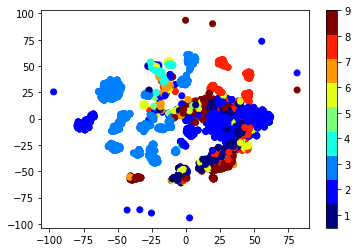

In [22]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(byte_file_df.iloc[:,1:].values)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=class_bytes, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<h2> Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> Feature extraction from asm files </h3>

In [23]:
Y=pd.read_csv("trainLabels.csv")
Y.head()

,Id,Class
0,01kcPWA9K2BOxQeS5Rju,1
1,04EjIdbPV5e1XroFOpiN,1
2,05EeG39MTRrI6VY21DPd,1
3,05rJTUWYAKNegBk2wE8X,1
4,0AnoOZDNbPXIr2MRBSCJ,1


In [24]:
byte_file_df = pd.read_pickle('pickels/byte_df')
fnames = byte_file_df['id'].values
fnames.shape

(5500,)

### Unigram for asm files

In [25]:
asm_file_df=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
asm_file_df = pd.merge(asm_file_df, Y,on='ID', how='left')
asm_file_df.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,18,66,15,43,83,0,17,48,29,1
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,18,29,48,82,12,0,14,0,20,1
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,13,42,10,67,14,0,11,0,9,1
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,6,8,14,7,2,0,8,0,6,1
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,12,9,18,29,5,0,11,0,11,1


<h4> Files sizes of each .asm file </h4>

In [26]:
asm_size_byte=pd.read_csv("asm_with_size.csv")
asm_size_byte.head()

,Unnamed: 0,ID,size_asm,Class
0,0,01azqd4InC7m9JpocGv5,56.229886,9
1,1,01IsoiSMh5gxyDYTl4CB,13.999378,2
2,2,01jsnpXSAlgw6aPeDxrU,8.507785,9
3,3,01kcPWA9K2BOxQeS5Rju,0.078190,1
4,4,01SuzwMJEIXsK7A8dQbl,0.996723,8


<h4> Distribution of .asm file sizes</h4>

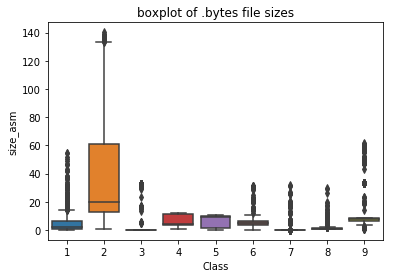

In [27]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size_asm", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [28]:
# add the file size feature to previous extracted features
print(asm_file_df.shape)
print(asm_size_byte.shape)
asm_file_df = pd.merge(asm_file_df, asm_size_byte.drop(['Unnamed: 0','Class'], axis=1),on='ID', how='left')
asm_file_df.head()

(10868, 53)
(10868, 4)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size_asm
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,66,15,43,83,0,17,48,29,1,0.078190
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,29,48,82,12,0,14,0,20,1,0.063400
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,42,10,67,14,0,11,0,9,1,0.041695
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,8,14,7,2,0,8,0,6,1,0.018757
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,9,18,29,5,0,11,0,11,1,0.037567


In [29]:
asm_file_df.rename(columns={'ID':'id'}, inplace=True)

In [30]:
data_y = asm_file_df['Class'].values

<h3> Multivariate Analysis on .asm file features </h3>

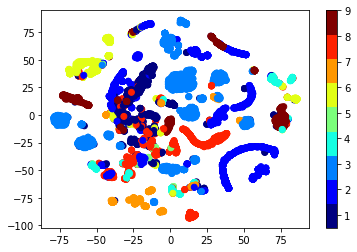

In [31]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(asm_file_df.drop(['id','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

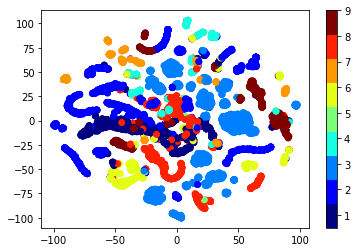

In [32]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(asm_file_df.drop(['id','Class', 'rtn', '.BSS:', '.CODE','size_asm'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

## Merge Byte and Asm files

In [33]:
result_df = pd.merge(byte_file_df, asm_file_df,on='id', how='left')
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size_asm
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,2290,1281,587,701,0,15,14,456,9,56.229886
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,1090,391,905,420,0,24,22,227,2,13.999378
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,547,5,451,56,0,27,0,117,9,8.507785
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,66,15,43,83,0,17,48,29,1,0.078190
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,1228,24,1546,107,0,15,0,76,8,0.996723


In [34]:
result_df.to_pickle('pickels/result_df')

In [35]:
result_df = pd.read_pickle('pickels/result_df')
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size_asm
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,2290,1281,587,701,0,15,14,456,9,56.229886
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,1090,391,905,420,0,24,22,227,2,13.999378
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,547,5,451,56,0,27,0,117,9,8.507785
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,66,15,43,83,0,17,48,29,1,0.078190
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,1228,24,1546,107,0,15,0,76,8,0.996723


## Add Image Feature for Asm files

In [36]:
result_df = pd.read_pickle('pickels/result_df')
class_labels = result_df['Class']
result_df.drop(['Class'], axis=1, inplace=True)

In [37]:
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,size_asm
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,808,2290,1281,587,701,0,15,14,456,56.229886
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,260,1090,391,905,420,0,24,22,227,13.999378
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,5,547,5,451,56,0,27,0,117,8.507785
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,18,66,15,43,83,0,17,48,29,0.078190
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,18,1228,24,1546,107,0,15,0,76,0.996723


In [38]:
print(class_labels.shape)

(5500,)


In [39]:
ids = result_df['id'].values
print(ids[:10])

['01azqd4InC7m9JpocGv5' '01IsoiSMh5gxyDYTl4CB' '01jsnpXSAlgw6aPeDxrU'
 '01kcPWA9K2BOxQeS5Rju' '01SuzwMJEIXsK7A8dQbl' '02IOCvYEy8mjiuAQHax3'
 '02JqQ7H3yEoD8viYWlmS' '02K5GMYITj7bBoAisEmD' '02mlBLHZTDFXGa7Nt6cr'
 '02MRILoE6rNhmt7FUi45']


In [40]:
img_fea_800_cols = []
for i in range(800):
    img_fea_800_cols.append('img'+str(i)) 
print(img_fea_800_cols[:10])    

['img0', 'img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8', 'img9']


In [41]:
import array

In [42]:
img_fea_asm = np.zeros((5500, 800))
for i,asmId in tqdm(enumerate(ids)):
    filename = 'asmFiles/'+asmId+'.asm'
    file = open(filename, 'rb')
    filelen = os.path.getsize(filename)
    width = int(filelen ** 0.5)
    rem = int(filelen/width)
    arr = array.array('B')
    arr.frombytes(file.read())
    img_fea_asm[i,:] = arr[:800]    

5500it [22:21,  4.10it/s]


In [43]:
asm_img_df = pd.DataFrame(data= img_fea_asm, columns= img_fea_800_cols)
asm_img_df.insert(loc=0, column='id', value=ids)
asm_img_df.head()

,id,img0,img1,img2,img3,img4,img5,img6,img7,img8,...,img790,img791,img792,img793,img794,img795,img796,img797,img798,img799
0,01azqd4InC7m9JpocGv5,72.0,69.0,65.0,68.0,69.0,82.0,58.0,48.0,48.0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0
1,01IsoiSMh5gxyDYTl4CB,46.0,116.0,101.0,120.0,116.0,58.0,48.0,48.0,52.0,...,56.0,54.0,32.0,40.0,80.0,69.0,41.0,13.0,10.0,46.0
2,01jsnpXSAlgw6aPeDxrU,72.0,69.0,65.0,68.0,69.0,82.0,58.0,48.0,48.0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0
3,01kcPWA9K2BOxQeS5Rju,72.0,69.0,65.0,68.0,69.0,82.0,58.0,49.0,48.0,...,109.0,111.0,100.0,101.0,108.0,32.0,102.0,108.0,97.0,116.0
4,01SuzwMJEIXsK7A8dQbl,72.0,69.0,65.0,68.0,69.0,82.0,58.0,48.0,48.0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0


In [44]:
result_df = pd.merge(result_df, asm_img_df,on='id', how='left')
result_df['Class'] = class_labels
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,img791,img792,img793,img794,img795,img796,img797,img798,img799,Class
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,9
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,54.0,32.0,40.0,80.0,69.0,41.0,13.0,10.0,46.0,2
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,9
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,111.0,100.0,101.0,108.0,32.0,102.0,108.0,97.0,116.0,1
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,61.0,8


In [45]:
result_df.to_pickle('pickels/result_df')

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

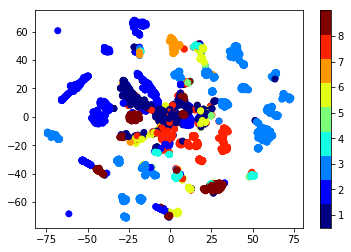

In [46]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_df.drop(['id', 'Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=class_labels, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

By combining bytes and asm files, TSNE is giving very good clustering, which implies, we can clasiify better if we combine both.

### Getting null values on normalization

In [47]:
result_df = pd.read_pickle('pickels/result_df')
result_df = normalize(result_df)

100%|████████████████████████████████████████████████████████████████████████████| 3111/3111 [00:00<00:00, 3310.49it/s]


In [48]:
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,img791,img792,img793,img794,img795,img796,img797,img798,img799,Class
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,9
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,0.416667,0.212963,0.313131,0.717172,0.549020,0.295238,0.000000,0.000000,0.320388,2
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,9
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,0.944444,0.842593,0.929293,1.000000,0.186275,0.876190,0.922330,0.776786,1.000000,1
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,8


In [62]:
result_df.to_pickle('pickels/result_df')

<h3> 4.5.3. Train and Test split</h3>

In [2]:
result_df = pd.read_pickle('pickels/result_df')
result_df.head()

,id,00,01,02,03,04,05,06,07,08,...,img791,img792,img793,img794,img795,img796,img797,img798,img799,Class
0,01azqd4InC7m9JpocGv5,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,9
1,01IsoiSMh5gxyDYTl4CB,0,0,0,0,0,0,0,0,0,...,0.416667,0.212963,0.313131,0.717172,0.549020,0.295238,0.000000,0.000000,0.320388,2
2,01jsnpXSAlgw6aPeDxrU,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,9
3,01kcPWA9K2BOxQeS5Rju,0,0,0,0,0,0,0,0,0,...,0.944444,0.842593,0.929293,1.000000,0.186275,0.876190,0.922330,0.776786,1.000000,1
4,01SuzwMJEIXsK7A8dQbl,0,0,0,0,0,0,0,0,0,...,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019,8


In [3]:
result_x = result_df.iloc[:, 1:3110]
result_x.head()

,00,01,02,03,04,05,06,07,08,09,...,img790,img791,img792,img793,img794,img795,img796,img797,img798,img799
0,0,0,0,0,0,0,0,0,0,0,...,0.485981,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019
1,0,0,0,0,0,0,0,0,0,0,...,0.439252,0.416667,0.212963,0.313131,0.717172,0.549020,0.295238,0.000000,0.000000,0.320388
2,0,0,0,0,0,0,0,0,0,0,...,0.485981,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019
3,0,0,0,0,0,0,0,0,0,0,...,0.934579,0.944444,0.842593,0.929293,1.000000,0.186275,0.876190,0.922330,0.776786,1.000000
4,0,0,0,0,0,0,0,0,0,0,...,0.485981,0.481481,0.481481,0.525253,0.525253,0.470588,0.485714,0.466019,0.455357,0.466019


In [4]:
result_y = result_df['Class']
print(result_y.shape)

(5500,)


In [5]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [6]:
print(X_train_merge.shape)
print(X_cv_merge.shape)
print(y_train_merge.shape)
print(y_cv_merge.shape)
print(X_test_merge.shape)
print(y_test_merge.shape)

(3520, 3109)
(880, 3109)
(3520,)
(880,)
(1100, 3109)
(1100,)


In [7]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h3> Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.05043712299174337
log_loss for c =  50 is 0.04119337259026798
log_loss for c =  100 is 0.04031123371416908
log_loss for c =  500 is 0.040903135472687445
log_loss for c =  1000 is 0.04117615435126462
log_loss for c =  2000 is 0.041227685621189974
log_loss for c =  3000 is 0.04123745520074478


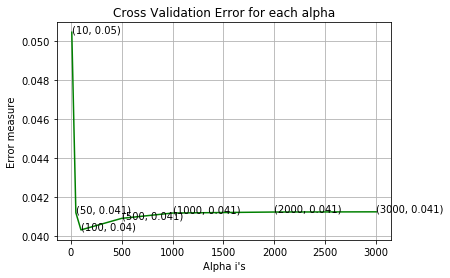

For values of best alpha =  100 The train log loss is: 0.019454149675867217
For values of best alpha =  100 The cross validation log loss is: 0.04031123371416908
For values of best alpha =  100 The test log loss is: 0.029739716372585732


In [10]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [17]:
r_cfl=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge,y_train_merge)
top_features = np.argsort(-r_cfl.feature_importances_)

In [27]:
top_fea_cols = [X_train_merge.columns[i] for i in list(top_features[:500])]
print(len(top_fea_cols))

500


In [28]:
X_train_merge_top = X_train_merge[top_fea_cols]
X_cv_merge_top = X_cv_merge[top_fea_cols]
X_test_merge_top = X_test_merge[top_fea_cols]

In [29]:
print(X_train_merge_top.shape)
print(X_cv_merge_top.shape)
print(X_test_merge_top.shape)

(3520, 500)
(880, 500)
(1100, 500)


For values of best alpha =  100 The train log loss is: 0.018737215993851603
For values of best alpha =  100 The cross validation log loss is: 0.03598700272892795
For values of best alpha =  100 The test log loss is: 0.027640695140105576
Number of misclassified points  0.36363636363636365
-------------------------------------------------- Confusion matrix --------------------------------------------------


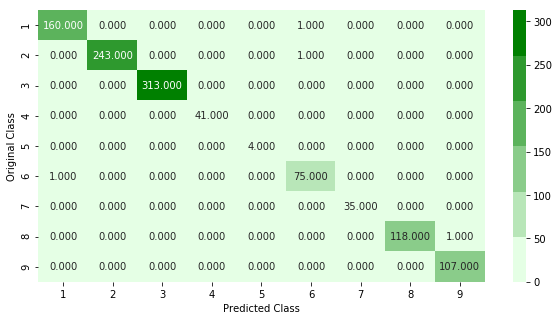

-------------------------------------------------- Precision matrix --------------------------------------------------


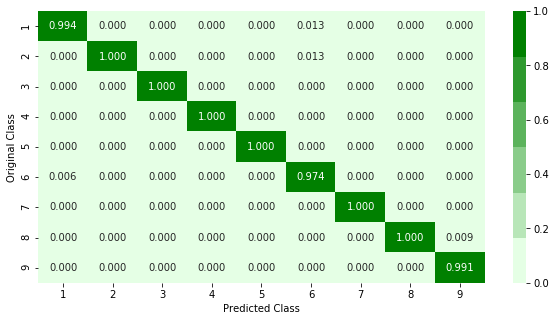

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


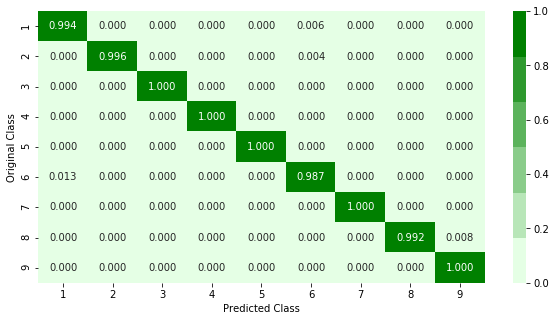

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge_top,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge_top, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge_top)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge_top))

We got 0.027 log-loss in test set and the confusion matrix shows better result. Only 36% of all points are mis-classified.

<h3> 4.5.5. XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.04055829672739721
log_loss for c =  50 is 0.0326956990175293
log_loss for c =  100 is 0.03254392931369087
log_loss for c =  500 is 0.032561443229789204
log_loss for c =  1000 is 0.032562305001160606
log_loss for c =  2000 is 0.032561769939746806
log_loss for c =  3000 is 0.0325618037290821


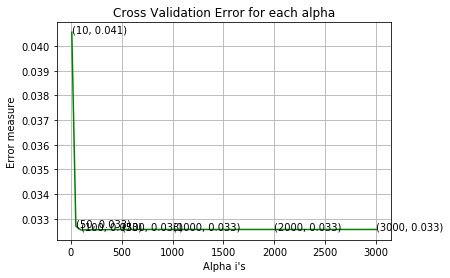

For values of best alpha =  100 The train log loss is: 0.01884070188973528
For values of best alpha =  100 The cross validation log loss is: 0.0325618037290821
For values of best alpha =  100 The test log loss is: 0.03253678387085014
Number of misclassified points  0.45454545454545453
-------------------------------------------------- Confusion matrix --------------------------------------------------


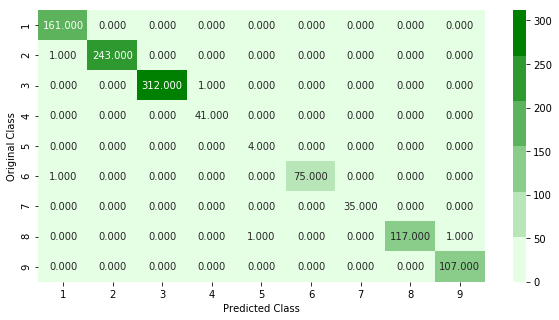

-------------------------------------------------- Precision matrix --------------------------------------------------


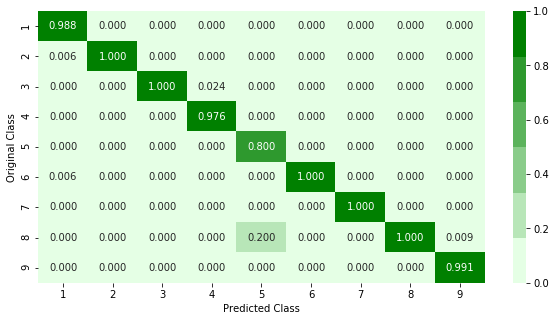

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


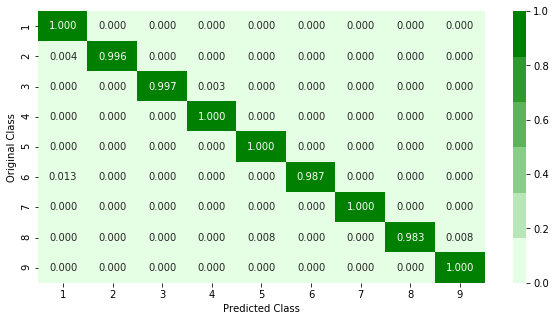

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge_top,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge_top, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge_top)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge_top,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge_top, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge_top)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge_top))

XGBoost is giving 0.03 log-loss and the precision matrix has some misclassifications.

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [34]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge_top, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 54.5min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [35]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.5}


For values of best alpha =  100 The train log loss is: 0.017634236966047653
For values of best alpha =  100 The cross validation log loss is: 0.03037605652544971
For values of best alpha =  100 The test log loss is: 0.022865067921710794
Number of misclassified points  0.18181818181818182
-------------------------------------------------- Confusion matrix --------------------------------------------------


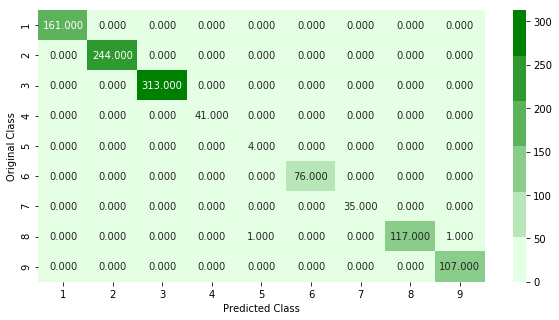

-------------------------------------------------- Precision matrix --------------------------------------------------


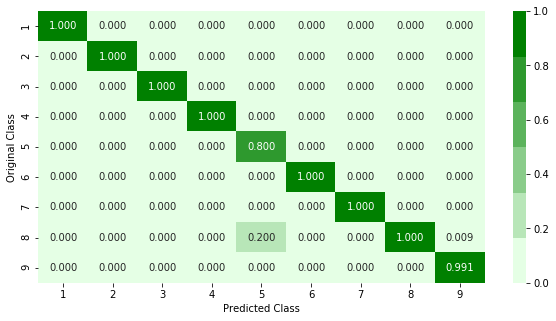

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


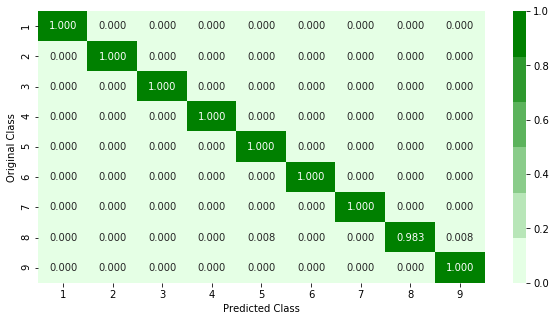

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000,max_depth=3,learning_rate=0.03,colsample_bytree=0.5,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge_top,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge_top, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge_top)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge_top)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge, sig_clf.predict(X_test_merge_top))

XGBoost did better job as compared to others with very less log-loss i.e 0.022 and very less misclassification points 0.18. Overall it worked very well with minimum log-loss as compared to other classifications and individual models.

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>